In [ ]:
# Course analysis of coursera data from Kaggle

In [1]:
# import numpy and pandas

import numpy as np
import pandas as pd

In [ ]:
# import visualization libraries and matplotlib inline

In [2]:
import seaborn as sns
import matplotlib as plt

#matplotlib inline

In [6]:
# read the csv file downloaded from kaggle into local drive and assign to data frame df

df = pd.read_excel( "courseera_data.xlsx")

In [ ]:
# checking info of dataframe courseera data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Course_ID                 891 non-null    int64  
 1   course_title              891 non-null    object 
 2   course_organization       891 non-null    object 
 3   course_Certificate_type   891 non-null    object 
 4   course_rating             891 non-null    float64
 5   course_difficulty         891 non-null    object 
 6   course_students_enrolled  891 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 48.9+ KB


In [8]:
#  check the sample records from the file 
df.head(5)

,Course_ID,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)Â² Systems Security Certified Practitione...,(ISC)Â²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [ ]:
# course_organization wise count

In [9]:
df['course_organization'].value_counts()

University of Pennsylvania              59
University of Michigan                  41
Google Cloud                            34
Johns Hopkins University                28
Duke University                         28
                                        ..
Eindhoven University of Technology       1
BCG                                      1
Universidade Estadual de Campinas        1
Royal Holloway, University of London     1
ScrumTrek                                1
Name: course_organization, Length: 154, dtype: int64

In [10]:
#  distinct course organization count
df['course_organization'].nunique()

154

In [14]:
# distinct courses offered
df['course_title'].nunique()

888

In [15]:
# count of specializations offered
df['course_Certificate_type'].nunique()

3

<AxesSubplot:xlabel='course_Certificate_type', ylabel='count'>

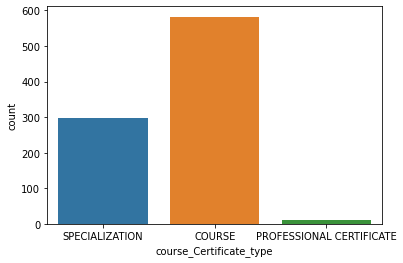

In [24]:
# now use seaborn to create count plot by course-certifacte-type

sns.countplot( x= 'course_Certificate_type', data = df)


<AxesSubplot:xlabel='course_difficulty', ylabel='count'>

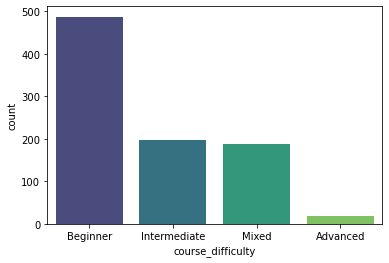

In [26]:
# course difficulty wise count plot

sns.countplot( x= 'course_difficulty', data = df, palette ='viridis')

<AxesSubplot:xlabel='course_Certificate_type', ylabel='count'>

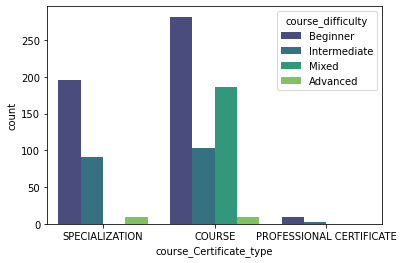

In [32]:
# now using difficulty as hue for each certificate type

sns.countplot( x= 'course_Certificate_type', data = df, hue = 'course_difficulty', palette ='viridis')

In [ ]:
# we observe that the no. of people who take profession certifications is far less when compared to other two..

In [38]:
# now lets aggregate by course rating

byRating = df.groupby('course_rating').count()

In [40]:
byRating

,Course_ID,course_title,course_organization,course_Certificate_type,course_difficulty,course_students_enrolled
course_rating,,,,,,
3.3,1,1,1,1,1,1
3.7,1,1,1,1,1,1
3.9,2,2,2,2,2,2
4.0,2,2,2,2,2,2
4.1,1,1,1,1,1,1
4.2,10,10,10,10,10,10
4.3,15,15,15,15,15,15
4.4,34,34,34,34,34,34
4.5,80,80,80,80,80,80


<AxesSubplot:xlabel='course_rating'>

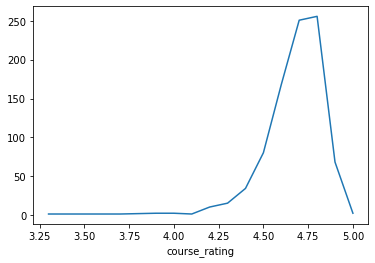

In [44]:
# now lets create a simple plot of this dataframe using any column

byRating['course_title'].plot()

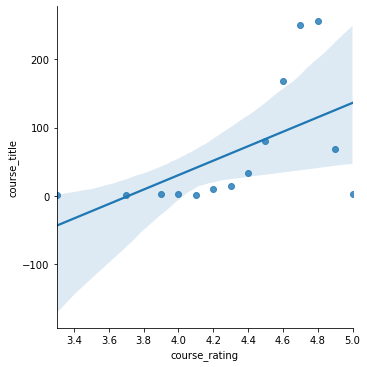

In [47]:
#  lets try to create seaborn's linear fit 


sns.lmplot(x='course_rating',y='course_title',data=byRating.reset_index())

In [ ]:
# it makes sense as the number of students enrolled increases as the rating increases

In [65]:
# convert the last column into a float by creating new column

new_col = df.apply( lambda row: row.course_students_enrolled[:-1], axis =1 )



In [52]:
new_col.head()

0    5.3
1     17
2    130
3     91
4    320
dtype: object

In [63]:
new_df = df
# create new column from course students enrolled without k obtained before and add to new df
new_df = new_df.insert(7,'new_col',  new_col )

In [69]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Course_ID                 891 non-null    int64  
 1   course_title              891 non-null    object 
 2   course_organization       891 non-null    object 
 3   course_Certificate_type   891 non-null    object 
 4   course_rating             891 non-null    float64
 5   course_difficulty         891 non-null    object 
 6   course_students_enrolled  891 non-null    object 
 7   new_col                   891 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 55.8+ KB


In [70]:
new_df.head()

,Course_ID,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,new_col
0,134,(ISC)Â² Systems Security Certified Practitione...,(ISC)Â²,SPECIALIZATION,4.7,Beginner,5.3k,5.3
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k,17
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k,130
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k,91
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k,320


In [72]:
new_df['new_col'] = new_df['new_col'].apply(pd.to_numeric, inline= True)

In [73]:
new_df.info()  # see that the last column is now numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Course_ID                 891 non-null    int64  
 1   course_title              891 non-null    object 
 2   course_organization       891 non-null    object 
 3   course_Certificate_type   891 non-null    object 
 4   course_rating             891 non-null    float64
 5   course_difficulty         891 non-null    object 
 6   course_students_enrolled  891 non-null    object 
 7   new_col                   891 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 55.8+ KB


In [83]:
# k has to changed to 1000
 

new_df['new_col'] = new_df ['new_col'].apply( lambda x: x*1000 )


In [84]:
new_df.head()

,Course_ID,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,new_col
0,134,(ISC)Â² Systems Security Certified Practitione...,(ISC)Â²,SPECIALIZATION,4.7,Beginner,5.3k,5300.0
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k,17000.0
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k,130000.0
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k,91000.0
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k,320000.0


In [97]:
new_df['new_col'].max()

830000.0

In [87]:
byRating_students = new_df.groupby('course_rating').sum()

In [86]:
byRating_students

,Course_ID,new_col
course_rating,,
3.3,767,140000.0
3.7,352,29000.0
3.9,957,91000.0
4.0,1532,46000.0
4.1,609,34000.0
4.2,6136,637200.0
4.3,7540,624000.0
4.4,17093,2782600.0
4.5,35463,5962000.0


In [131]:
import re

In [134]:
new_df ['course_title'].apply( lambda x:  re.sub(r"[^a-zA-Z0-9]","",x) )

#new_string = ''.join(filter(str.isalnum, string))  re.sub(r"[^a-zA-Z0-9]","",string)

0            ISCSystemsSecurityCertifiedPractitionerSSCP
1      ACrashCourseinCausalityInferringCausalEffectsf...
2                              ACrashCourseinDataScience
3                                    ALawStudentsToolkit
4                         ALifeofHappinessandFulfillment
                             ...                        
886                                               Python
887                                    Psycholinguistics
888                                           JavaScript
889                                                     
890                                                     
Name: course_title, Length: 891, dtype: object

<AxesSubplot:ylabel='Frequency'>

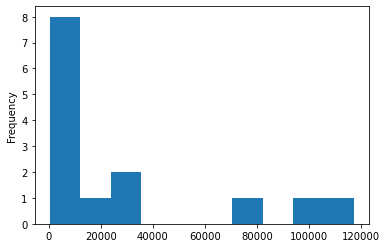

In [141]:
byRating_students['Course_ID'].plot.hist()

#sns.heatmap(new_df, cmap='viridis')

<AxesSubplot:ylabel='Density'>

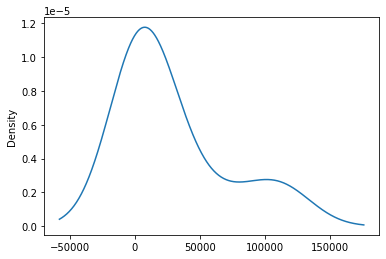

In [144]:
byRating_students['Course_ID'].plot.density()

In [147]:
ndf = byRating_students
ndf

,Course_ID,new_col
course_rating,,
3.3,767,140000.0
3.7,352,29000.0
3.9,957,91000.0
4.0,1532,46000.0
4.1,609,34000.0
4.2,6136,637200.0
4.3,7540,624000.0
4.4,17093,2782600.0
4.5,35463,5962000.0


<AxesSubplot:xlabel='course_rating', ylabel='new_col'>

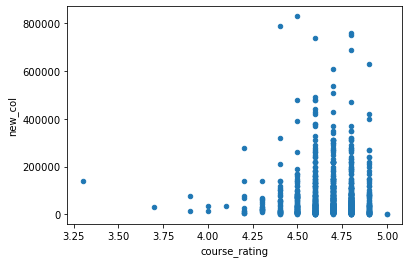

In [152]:
new_df.plot.scatter(x= 'course_rating', y= 'new_col')